# Линейная алгебра: сходство текстов и аппроксимация функций#

## Programming Assignment (Week-2) ##

Данное задание основано на материалах секции, посвященной введению в линейную алгебру. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy и SciPy.

__Задача 1: Сравнение предложений
Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:__


кошки (животные)
UNIX-утилита cat для вывода содержимого файлов
версии операционной системы OS X, названные в честь семейства кошачьих
Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Первые 3 предложения из файла sentences.txt:

_In comparison to dogs, cats have not undergone major changes during the domestication process.
As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.
A common interactive use of cat for a single file is to output the content of a file to standard output.
Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals._

Код и результаты:

In [4]:
from scipy import spatial
import pandas as pd
import re

f = open('sentences.txt', 'r')

txt = f.read().lower().split('\n')
lsw = []
ls = []
dc = {}
m = 0
for i in txt:
    sent = re.split('[^a-z]', i)
    for j in sent:
        if (j != '') & (j not in lsw):
            lsw.append(j)
        if j != '':
            ls.append(j)
    dc[m] = ls
    m += 1
    ls = []

df = pd.DataFrame()
for k in dc.keys():
    for i in lsw:
        a = dc[k].count(i)
        df.loc[k, i] = a

res = []
for i in range(0, len(df)):
    res.append(spatial.distance.cosine(df.loc[0], df.loc[i]))
df['va'] = res
df = df.sort_values('va')
res = df[1:3].index.tolist()
res = str(res[0])+' '+str(res[1])
print(res)
f.close()

6 4


Вывод результатов в файл w2-t1.txt:

In [5]:
with open("w2-t1.txt", "w") as output:
    output.write(res)

__Задача 2: Аппроксимация функции__

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$$

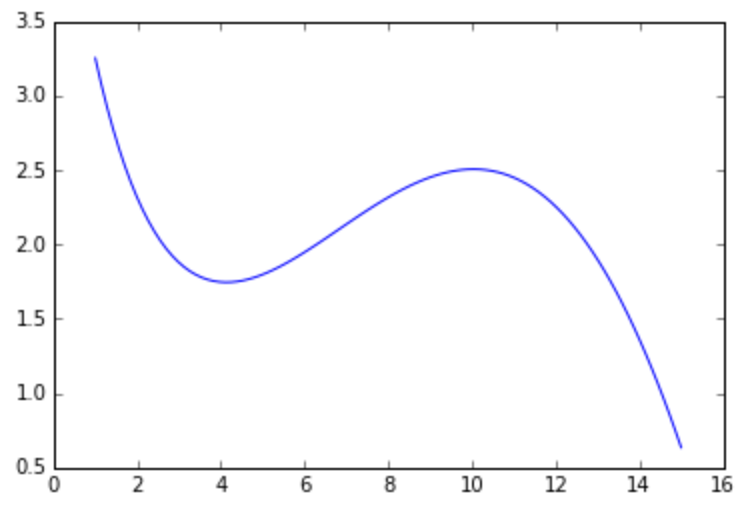

Необходимо найти приближение функции многочленом, решая систему линейных уравнений:


1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

Код и результаты:

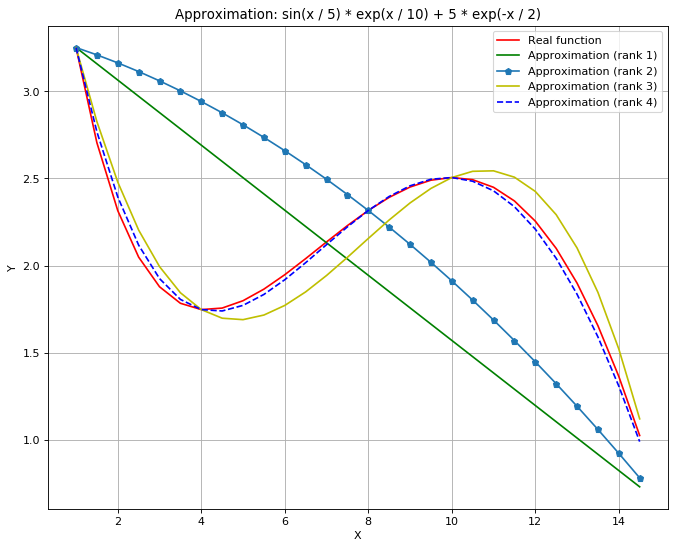

4.36 -1.3 0.19 -0.01


In [13]:
import scipy.linalg
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)

pr = 1
X1 = np.array([[1 ** n for n in range(0, pr + 1)],
               [15 ** n for n in range(0, pr + 1)]])
Y1 = np.array([f(1), f(15)])
b1, a1 = scipy.linalg.solve(X1, Y1)

pr = 2
X2 = np.array([[1 ** n for n in range(0, pr + 1)],
               [8 ** n for n in range(0, pr + 1)],
               [15 ** n for n in range(0, pr + 1)]])
Y2 = np.array([f(1), f(8), f(15)])
c2, b2, a2 = scipy.linalg.solve(X2, Y2)

pr = 3
X3 = np.array([[1 ** n for n in range(0, pr + 1)],
               [4 ** n for n in range(0, pr + 1)],
               [10 ** n for n in range(0, pr + 1)],
               [15 ** n for n in range(0, pr + 1)]])
Y3 = np.array([f(1), f(4), f(10), f(15)])
d3, c3, b3, a3 = scipy.linalg.solve(X3, Y3)

pr = 4
X4 = np.array([[1 ** n for n in range(0, pr + 1)],
               [4 ** n for n in range(0, pr + 1)],
               [8 ** n for n in range(0, pr + 1)],
               [10 ** n for n in range(0, pr + 1)],
               [15 ** n for n in range(0, pr + 1)]])
Y4 = np.array([f(1), f(4), f(8), f(10), f(15)])
e4, d4, c4, b4, a4 = scipy.linalg.solve(X4, Y4)

x = np.arange(1, 15, .5)
y1 = a1*x+b1
y2 = a2*x**2+b2*x+c2
y3 = a3*x**3+b3*x**2+c3*x+d3
y4 = a4*x**4+b4*x**3+c4*x**2+d4*x+e4

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Approximation: sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, f(x), 'r-', label='Real function')
plt.plot(x, y1, 'g-', label='Approximation (rank 1)')
plt.plot(x, y2, 'p-', label='Approximation (rank 2)')
plt.plot(x, y3, 'y-', label='Approximation (rank 3)')
plt.plot(x, y4, 'b--', label='Approximation (rank 4)')
plt.grid()
plt.legend()
plt.show()

res = str(round(d3, 2)) + ' ' + str(round(c3, 2)) + ' ' + str(round(b3, 2)) + ' ' + str(round(a3, 2))
print(res)

Вывод результатов в файл w2-t2.txt:

In [9]:
with open("w2-t2.txt", "w") as output:
    output.write(res)